In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [15]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

### This means that out of the 14,999 entries; 3571 left the job & 11428 retained their position.

In [21]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321



### Satisfaction Level: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
### Average Monthly Hours: Average monthly hours are higher in employees leaving the firm (199 vs 207)
### Promotion Last 5 Years: Employees who are given promotion are likely to be retained at firm


In [1]:
pd.crosstab(df.salary, df.left)

NameError: name 'pd' is not defined

### We can see that employees having less salary left the job more.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1278f8d00>,
      dtype=object)

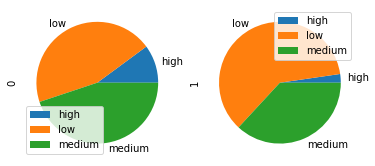

In [36]:
pd.crosstab(df.salary, df.left).plot(kind = "pie", subplots = "True")

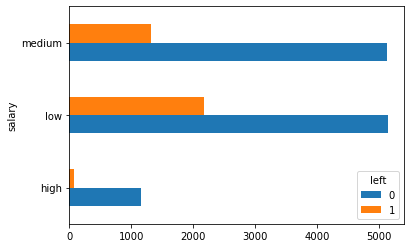

In [38]:
pd.crosstab(df.salary, df.left).plot(kind = "barh")

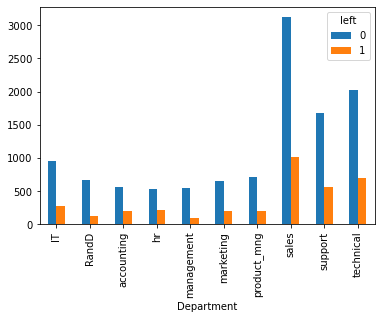

In [67]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

## The parameters to evaluate job retention can be:-

### 1. Satisfaction Level
### 2. Average Monthly Hours
### 3. Promotion Last 5 Years
### 4. Salary

In [69]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [73]:
salary_dummies = pd.get_dummies(subdf.salary)
salary_dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [76]:
final = pd.concat([subdf, salary_dummies], axis = "columns")
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [78]:
final.drop('salary',axis='columns',inplace=True)
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [79]:
X = final
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [147]:
Y = df.left
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.2)

In [161]:
len(X_train) , len(X_test) , len(Y_train) , len(Y_test)

(2999, 12000, 2999, 12000)

In [162]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [163]:
model.fit(X_train, Y_train)

LogisticRegression()

In [164]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [165]:
model.score(X_test, Y_test)

0.78175